# Observations & Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#tudy_results.head()
#mouse_metadata.head()


In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
 # Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number


249

In [4]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice
                  
               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data_g989_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
data_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexg989 = combined_df[combined_df['Mouse ID'] == 'g989'].index
clean_df = combined_df.drop(indexg989)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
 # Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count

248

In [8]:
clean_df["Mouse ID"].count()

1880

# Summary statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
regimen_median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
regimen_var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
regimen_std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
regimen_sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_statistics_df = pd.DataFrame({"Mean Tumor Volume" : regimen_mean,
                        "Median Tumor Volume" : regimen_median,
                        "Variance Tumor Volume" : regimen_var,
                        "Std. Dev. Tumor Volume" : regimen_std,
                        "SEM Tumor Volume" : regimen_sem})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

groupby_drugregimen = clean_df.groupby("Drug Regimen")
agg_stats = groupby_drugregimen[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

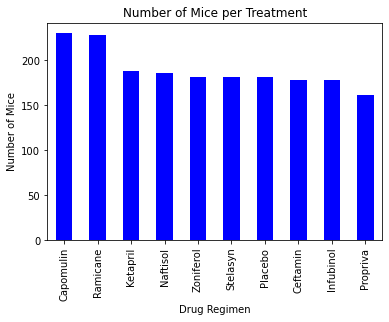

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_treatments = combined_df["Drug Regimen"].value_counts()
total_treatments

plot_total_treatments = total_treatments.plot.bar(color="b")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.show()

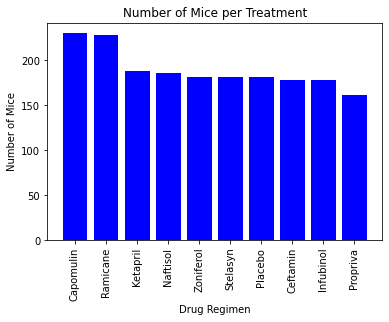

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = total_treatments.index.values
y_axis = total_treatments.values
plt.bar(x_axis, y_axis, color="b")

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.show()

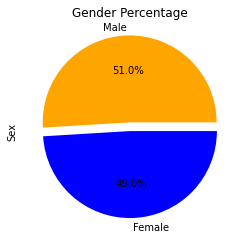

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
gender_count
explode = (0.1, 0)
colors = ['orange', 'blue']
gender_plot = gender_count.plot.pie(explode= explode, colors = colors, autopct="%1.1f%%")
plt.title("Gender Percentage")

plt.show()

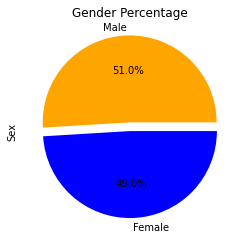

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['orange', 'blue']
plt.title("Gender Percentage")
gender_plot = gender_count.plot.pie(explode= explode, colors = colors, autopct="%1.1f%%")
explode = (0.1, 0)

plt.show()

# Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


four_treatment_vol = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_treatment_vol

final_tumor_volume_df = four_treatment_vol.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_volume_df.head()

merged_treatments_df = pd.merge(four_treatment_vol, final_tumor_volume_df, on=('Mouse ID', 'Timepoint'))
merged_treatments_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for treatment in treatments_list:
    treatments_tumors  =  merged_treatments_df.loc[merged_treatments_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(treatments_tumors)
    
    quartiles = treatments_tumors.quantile([.25,.5,.75])
    lower_quart  =  quartiles[0.25]
    upper_quart  =  quartiles[0.75]
    
    IQR  =  upper_quart-lower_quart
    
    lower_bound = lower_quart - (1.5*IQR)
    upper_bound = upper_quart + (1.5*IQR)
     
    # Determine outliers using upper and lower bounds
  
    outlier_count = treatments_tumors.loc[(treatments_tumors < lower_bound) 
                              | (treatments_tumors> upper_bound)].count()
    counter = 0
    if counter == 0:   
        print(f"The lower quartile of {treatment} is: {lower_quart}")
    print(f"The upper quartile of {treatment} is: {upper_quart}")
    print(f"The interquartile range of {treatment} is: {IQR}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {treatment} could be outliers")
    print(f"Values above {upper_bound} for {treatment} could be outliers")
    print(f'Number of {treatment} outliers: {outlier_count}')
    print(f"--------------------------------------------------------")
 

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers
Values above 51.83201549 for Capomulin could be outliers
Number of Capomulin outliers: 0
--------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers
Values above 54.30681135 for Ramicane could be outliers
Number of Ramicane outliers: 0
--------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubino

# Line and Scatter Plots

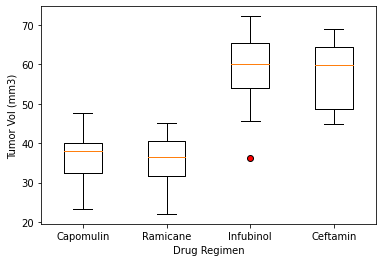

In [22]:
flierprops_config = dict(markerfacecolor='r', marker='o')
fig1, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_vol_data, labels = treatments_list, flierprops=flierprops_config)
plt.show()

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_timevsvol_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "u364",:]
cap_timevsvol_df



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(cap_average_tumor_vol['Weight (g)'],cap_average_tumor_vol['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Weight")
plt.ylabel("y")
clb.set_label("Median")
plt.show()



# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


